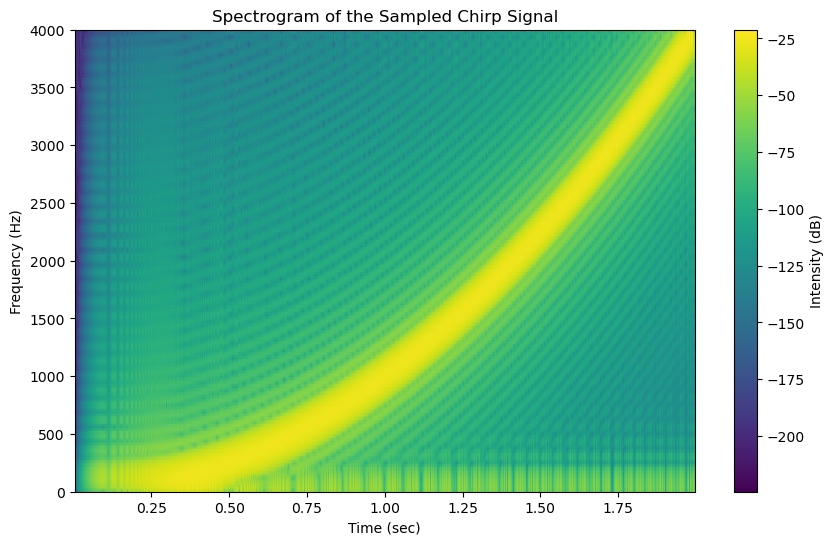

In [2]:
########################## R1 ##########################

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

# R1.a) Signal hearing.
# Define the sampling frequency as 8000 samples per second.
Fs = 8000

# Create the time vector from 0 to 2 seconds.
t = np.arange(0, 2, 1/Fs)

# Set the constant k1 to 1000 as specified in the assignment.
k1 = 1000

# Implement the sampled signal.
# The formula calculates the cosine of 2 times pi times one third of k1 times t cubed.
x = np.cos(2 * np.pi * ((1/3) * k1 * t**3))

# Ensure that the data type of my vector x is float32.
x = x.astype(np.float32)

# Scale the float32 array to a 16-bit integer format for better compatibility with WAV.
x_scaled = np.int16(x * 32767)

# Save the array as a wav file named 'chirp_signal.wav'.
wavfile.write('chirp_signal.wav', Fs, x_scaled)

# R1.a) Comment on the relationship between what is heard and the signal that was created.
# When listening to the signal, one can hear a sound whose pitch increases rapidly over time.
# This makes perfect sense because the mathematical equation used defines a chirp whose instantaneous 
# frequency increases quadratically with time.

# R1.b) Spectrogram computation and display.
# Set the window size N to 64.
N = 64

# Generate a Hanning window of size N.
window = signal.windows.hann(N)

# Calculate the overlap to be exactly 3 times N divided by 4.
noverlap = int(3 * (N / 4))

# Setthe FFT length to be 4 times N.
nfft = 4 * N

# Compute the spectrogram using the parameters defined above.
frequencies, times, Sxx = signal.spectrogram(x, fs=Fs, window=window, nperseg=N, noverlap=noverlap, nfft=nfft)

# Create a plot figure for the spectrogram.
plt.figure(figsize=(10, 6))

# Plot the magnitude of the spectrogram in decibels using a colormesh.
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')

# Add appropriate labels to the axes.
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

# Add a descriptive title to the plot.
plt.title('Spectrogram of the Sampled Chirp Signal')

# Add a color bar to indicate the intensity in decibels.
plt.colorbar(label='Intensity (dB)')

# Save the generated spectogram to a file.
plt.savefig('spectrogram_R1.png', dpi=600, bbox_inches='tight')

# Display the generated plot on the screen.
plt.show()

# R1.c) Comment on the relationship between the spectrogram and the sound heard.
# By looking at the spectrogram, one can visually track a distinct curve that bends upwards toward higher frequencies.
# This upward visual curve perfectly matches the increasingly high-pitched sweeping sound that is heard when one playes the audio.

# Because the sampling frequency is 8000Hz and maximum signal frequency is 1000 * 2^2 = 4kHz <= 8/2kHz = 4kHz, there is no aliasing in this case.
# The Nyquist frequency is 4kHz * 2 = 8kHz (take the derivative of the cosine argument).

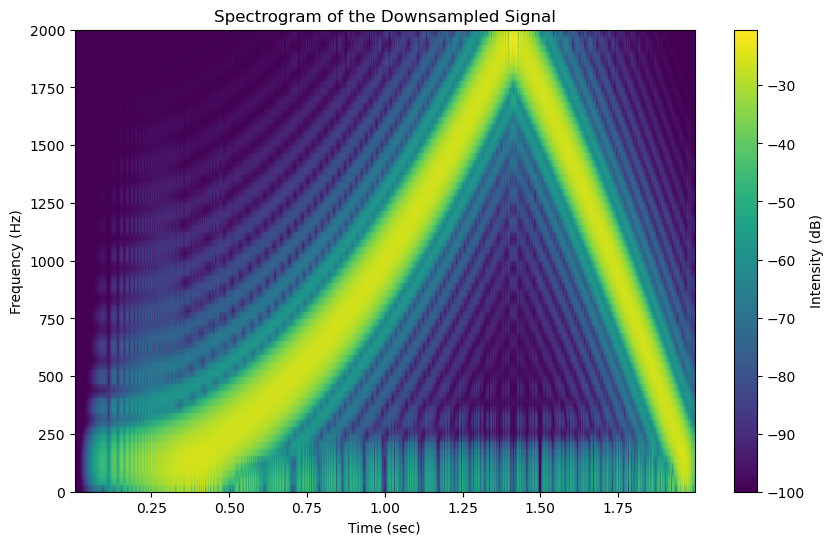

In [3]:
########################## R2 ##########################

# R2.a)
# Sample the original signal by taking every second element to obtain y(n) equal to x(2n)-
y = x[::2]

# Calculate the new sampling frequency.
# Since the signal is downsampled by a factor of 2, the new sampling frequency is half of the original.
Fs_y = int(Fs / 2)

# Scale the float32 array to a 16-bit integer format for compatibility with the WAV format.
y_scaled = np.int16(y * 32767)

# Save the new array as a wav file named 'aliased_chirp_signal.wav'.
# This allows one to listen to y(n) without PyAudio.
wavfile.write('aliased_chirp_signal.wav', Fs_y, y_scaled)

# R2.a) Indicate the sampling frequency of signal y(n) and justify the answer.
# The sampling frequency of signal y(n) is 4000 Hz.
# By sampling the original signal at every second index, the time step between consecutive samples is doubled.
# Consequently, the sampling rate is halved from the original 8000 Hz to 4000 Hz.

# R2.b)
# Adjust the window length for the spectrogram to keep the window duration in seconds the same
# The original window length was 64 samples at 8000 Hz, which corresponds to 0.008 seconds.
# For the new sampling rate of 4000 Hz, the window length must be exactly 32 samples.
N_y = int(N * (Fs_y / Fs))

# Generate a Hanning window of size N_y.
window_y = signal.windows.hann(N_y)

# Calculate the overlap to be exactly 3 times N_y divided by 4.
noverlap_y = int(3 * (N_y / 4))

# Set the FFT length to be 4 times N_y.
nfft_y = 4 * N_y

# Compute the spectrogram for the downsampled signal.
frequencies_y, times_y, Syy = signal.spectrogram(y, fs=Fs_y, window=window_y, nperseg=N_y, noverlap=noverlap_y, nfft=nfft_y)

# Create a plot figure for the new spectrogram.
plt.figure(figsize=(10, 6))

# Plot the magnitude of the spectrogram in decibels.
# A tiny constant is added to the magnitude to prevent log of zero warnings.
plt.pcolormesh(times_y, frequencies_y, 10 * np.log10(Syy + 1e-10), shading='gouraud')

# Add appropriate labels to the axes.
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

# Add a descriptive title to the plot.
plt.title('Spectrogram of the Downsampled Signal')

# Add a color bar to indicate the intensity in decibels.
plt.colorbar(label='Intensity (dB)')

# Save the generated spectogram to a file.
plt.savefig('spectrogram_R2.png', dpi=600, bbox_inches='tight')

# Display the generated plot on the screen.
plt.show()

# R2.b) Explain what is heard and observed.
# When listening to the new audio file, the pitch increases initially but then starts to decrease, creating a siren-like sweeping effect.
# In the spectrogram, the frequency curve rises until it hits a frequency of 2000 Hz.
# Once it exceeds this limit, the frequency component folds back down into the lower frequencies.
# This occurs because we are sampling a signal (x(n)), which has as maximum frequency of 4kHz (because it has no aliasing), 
# and our sampling frequency is lower than the Nyquist frequency of 8kHz (fs = 4kHz -> N = 32 for the Hanning window), which leads to aliasing.
# Think of it as the frequency components of the replica at -2pi and 2pi gradually folding back into the baseband as the original frequency increases, 
# creating a mirrored effect in the spectrogram and a corresponding change in the perceived pitch of the sound (the components of the replica at 2pi increase
# in frequency which leads to a decrease in the perceived frequency in the baseband).

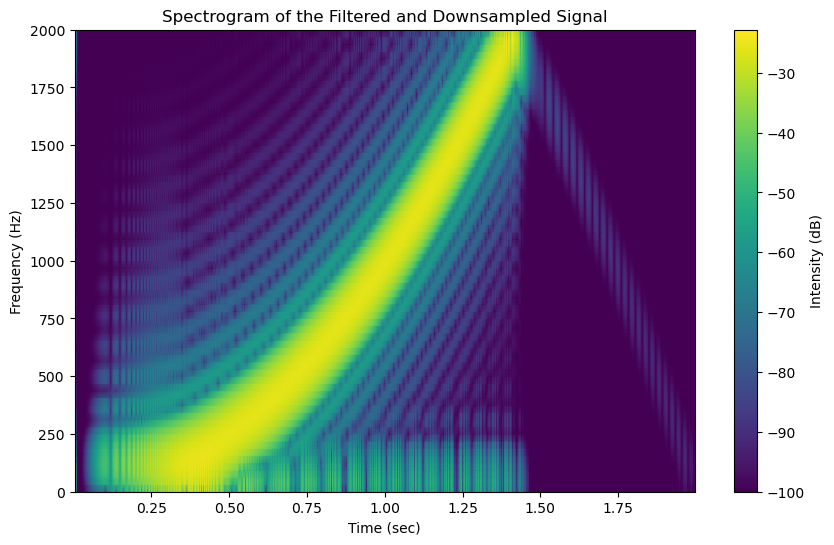

In [5]:
########################## R3 ##########################

# R3.a)
# Generate an order-100 low-pass FIR filter with a cut-off frequency of 0.5.
h = signal.firwin(101, 0.5, pass_zero='lowpass')

# Filter the original signal x using the generated FIR filter.
xf = signal.lfilter(h, [1.0], x)

# Ensure that the data type of the filtered vector xf is the same as x.
xf = xf.astype(np.float32)

# Sample the filtered signal so that the new sampling rate is Fs divided by 2.
xf_sampled = xf[::2]

# Calculate the new sampling frequency.
Fs_xf = int(Fs / 2)

# Scale the float32 array to a 16-bit integer format for WAV compatibility.
xf_scaled = np.int16(xf_sampled * 32767)

# Save the downsampled filtered array as a wav file to listen to the result safely.
wavfile.write('filtered_downsampled_chirp.wav', Fs_xf, xf_scaled)

# Adjust the window length for the spectrogram to keep the window duration in seconds the same.
N_xf = int(N * (Fs_xf / Fs))

# Generate a Hanning window of size N_xf.
window_xf = signal.windows.hann(N_xf)

# Calculate the overlap to be exactly 3 times N_xf divided by 4.
noverlap_xf = int(3 * (N_xf / 4))

# Set the FFT length to be 4 times N_xf.
nfft_xf = 4 * N_xf

# Compute the spectrogram for the filtered and downsampled signal.
frequencies_xf, times_xf, Sxf = signal.spectrogram(xf_sampled, fs=Fs_xf, window=window_xf, nperseg=N_xf, noverlap=noverlap_xf, nfft=nfft_xf)

# Create a plot figure for the new spectrogram.
plt.figure(figsize=(10, 6))

# Plot the magnitude of the spectrogram in decibels.
plt.pcolormesh(times_xf, frequencies_xf, 10 * np.log10(Sxf + 1e-10), shading='gouraud')

# Add appropriate labels to the axes.
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

# Add a descriptive title to the plot.
plt.title('Spectrogram of the Filtered and Downsampled Signal')

# Add a color bar to indicate the intensity in decibels.
plt.colorbar(label='Intensity (dB)')

# Save the generated spectogram to a file.
plt.savefig('spectrogram_R3.png', dpi=600, bbox_inches='tight')

# Display the generated plot on the screen.
plt.show()

# R3.a) Explain the differences in what is heard and observed, relative to what was heard and observed in item 2.
# When listening to the filtered and downsampled audio file, the pitch increases initially but then the sound smoothly fades into silence.
# In the spectrogram, the frequency curve rises until it hits the Nyquist limit of 2000 Hz and then abruptly disappears.
# Unlike the observation in item 2, no frequency components fold back down into the lower frequencies.
# This occurs because the anti-aliasing filter successfully removes the frequency components above 2000 Hz before the signal is sampled.
# The filter has a cut-off frequency of 0.5 in the discrete-time angular frequency scale, which corresponds exactly to 2000 Hz.
# Consequently, there is no high-frequency content left to cause aliasing, completely preventing the mirrored siren-like effect that was present in the previous signal.
# Keep in mind that this will result in information loss, although exclusively of high-frequency components that would have caused aliasing, instead
# of the entire signal being affected by the aliasing scrambling.

Shape of the loaded signal: (1000,)


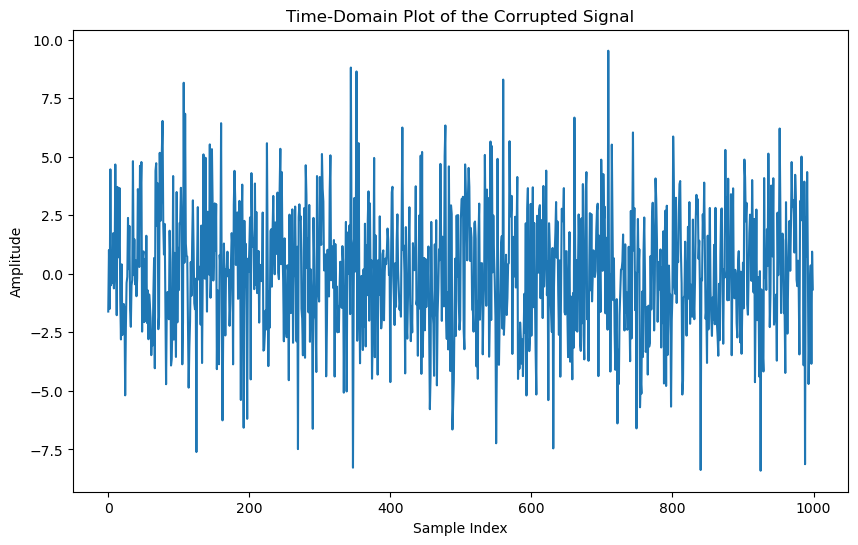

The two dominant normalized digital frequencies (cycles/sample) are: [0.12 0.03]
The two dominant frequencies in Hz are: [120.  30.]


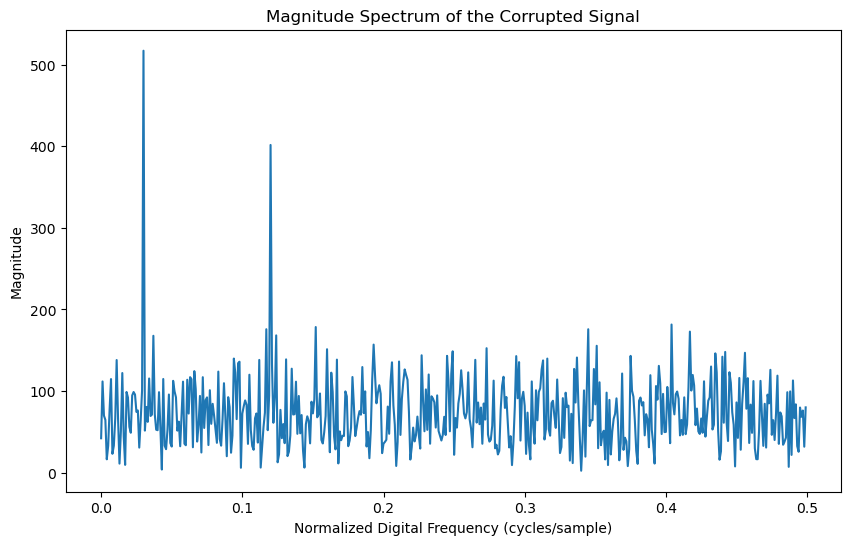

The determined threshold to isolate exactly two peaks is: 181.504, which is 35.1% of the maximum magnitude.


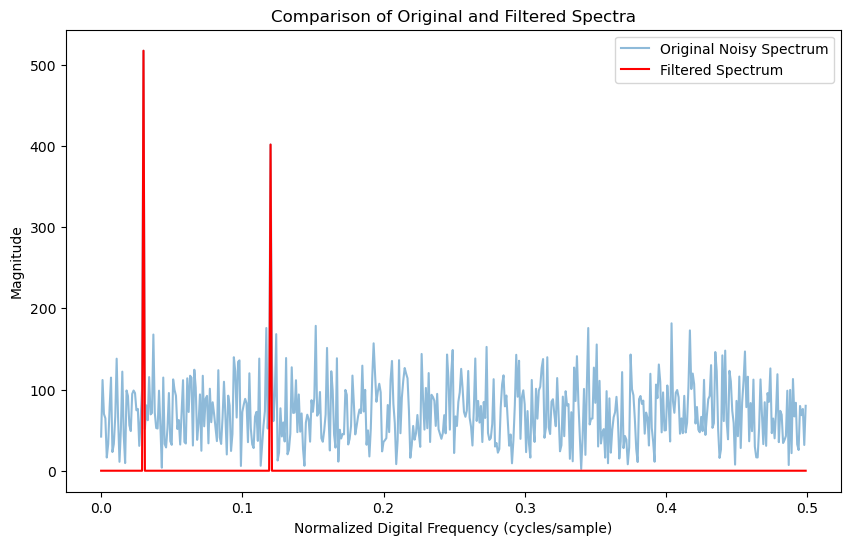

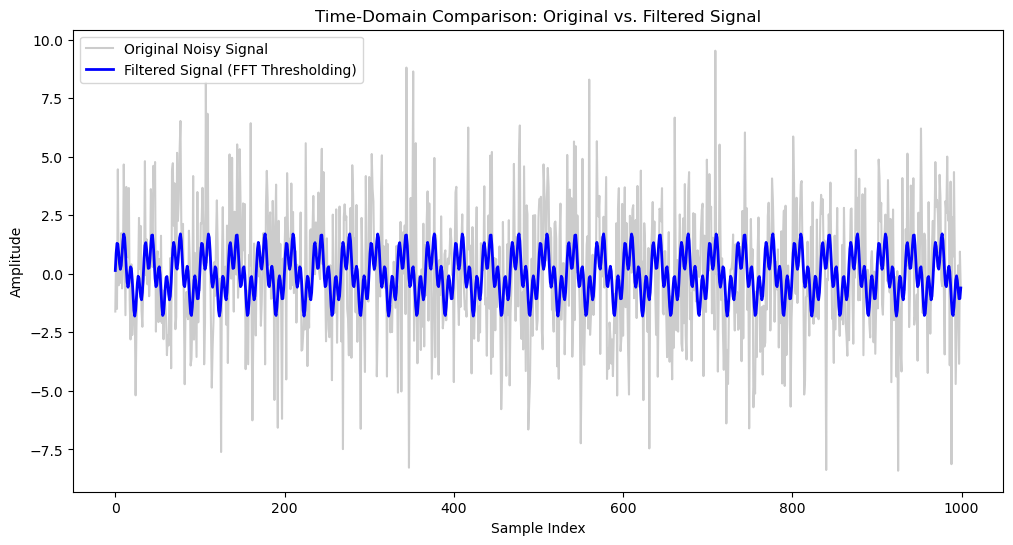

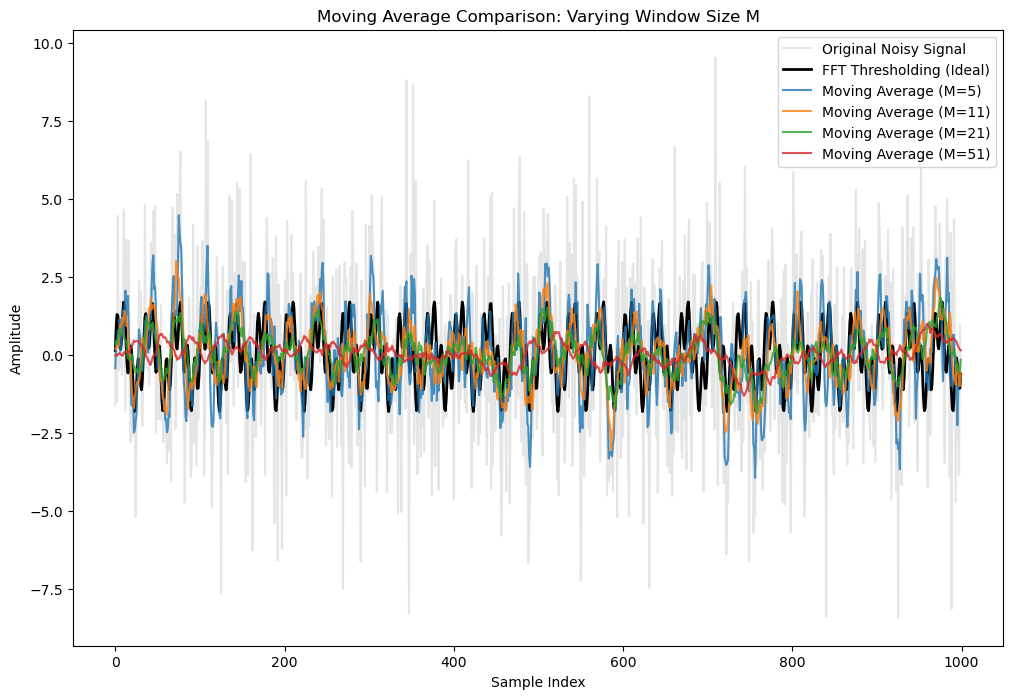

In [6]:
########################## R3 ##########################

# R4.a)
# Load the signal data from the provided numpy file.
signal_data = np.load('sum_of_sines.npy')

# Print the shape of the loaded signal to confirm it has been loaded correctly.
print("Shape of the loaded signal:", signal_data.shape)

# Create a figure to plot the loaded time-domain signal.
plt.figure(figsize=(10, 6))

# Plot the signal against its sample indices since a specific sampling frequency was not provided for this file.
plt.plot(signal_data)

# Add appropriate labels to the axes.
plt.ylabel('Amplitude')
plt.xlabel('Sample Index')

# Add a descriptive title to the plot.
plt.title('Time-Domain Plot of the Corrupted Signal')

# Save the corrupted signal to a file.
plt.savefig('corrupted_signal_R4.png', dpi=600, bbox_inches='tight')

# Display the generated plot on the screen.
plt.show()

# R4.a) Can you identify the two frequencies in the signal?
# By simply observing the time-domain plot, it is extremely difficult to precisely identify the two frequencies.
# Plus, we don't know the sampling frequency, but we assume, for now, it is 1000Hz (because it has 1000 samples...?).

# R4.b)
# Compute the signal's frequency spectrum using the Fast Fourier Transform (FFT) algorithm.
spectrum = np.fft.fft(signal_data)

# Compute the magnitude spectrum.
magnitude_spectrum = np.abs(spectrum)

# Calculate the total number of samples.
N_samples = len(signal_data)

# Generate the normalized digital frequency axis.
# This maps the digital frequencies from 0 to 1 across the number of samples.
normalized_freqs = np.arange(N_samples) / N_samples

# Extract only the positive half of the spectrum for a clearer visualization.
half_N = N_samples // 2
positive_freqs = normalized_freqs[:half_N]
positive_magnitude = magnitude_spectrum[:half_N]

# Find the indices of the two highest peaks in the positive magnitude spectrum.
# The argsort function sorts the indices based on the magnitude values in ascending order, so the last two indices correspond to the largest peaks.
top_two_indices = np.argsort(positive_magnitude)[-2:]

# Extract the corresponding normalized digital frequencies using the found indices.
extracted_frequencies = positive_freqs[top_two_indices]

# Print the extracted frequencies to the console for verification.
print("The two dominant normalized digital frequencies (cycles/sample) are:", extracted_frequencies)

# Assuming a 1000 Hz sampling frequency, we can convert the normalized digital frequencies to actual frequencies in Hz.
# The conversion is done by multiplying the normalized frequency by the sampling frequency.
sampling_frequency = 1000
actual_frequencies = extracted_frequencies * sampling_frequency

print("The two dominant frequencies in Hz are:", actual_frequencies)

# Create a figure to plot the magnitude spectrum.
plt.figure(figsize=(10, 6))

# Plot the positive magnitude spectrum against the normalized digital frequency.
plt.plot(positive_freqs, positive_magnitude)

# Add appropriate labels to the axes.
plt.ylabel('Magnitude')
plt.xlabel('Normalized Digital Frequency (cycles/sample)')

# Add a descriptive title to the plot.
plt.title('Magnitude Spectrum of the Corrupted Signal')

# Save the spectrum of the corrupted signal to a file.
plt.savefig('corrupted_signal_spectrum_R4.png', dpi=600, bbox_inches='tight')

# Display the generated plot on the screen to observe the peaks.
plt.show()

# R4.b) Comment on what is observed.
# Looking at the magnitude spectrum, two distinct and sharp peaks stand out above a noisy baseline.
# Based on the extracted data, the two dominant normalized digital frequencies are exactly 0.03 and 0.12 cycles/sample,
# which correspond to actual frequencies of 30 Hz and 120 Hz, respectively, assuming a sampling frequency of 1000 Hz.
# The noise floor remains far below these two distinct peaks.

# R4.c)
# A copy of the original complex spectrum is created to preserve the original data.
filtered_spectrum = spectrum.copy()

# A threshold is defined to distinguish the dominant sinusoidal peaks from the noise floor.
# Given that we have the apriori knowledge that there are exactly two dominant frequencies, 
# we can iteratively increase the threshold until only two peaks remain in the positive magnitude spectrum.
# This leads to the optimal threshold that effectively eliminates the noise while preserving the two sine wave components.
max_magnitude = np.max(positive_magnitude)
threshold = 0.0
for th in np.arange(0.0, max_magnitude, 0.001):
    # The number of bins exceeding the current threshold is counted in the positive spectrum.
    peak_count = np.sum(positive_magnitude > th)
    
    # If exactly two peaks remain, the ideal threshold has been found.
    if peak_count == 2:
        threshold = np.round(th, 3)
        break

print(f"The determined threshold to isolate exactly two peaks is: {threshold:.3f}, which is {threshold/max_magnitude*100:.1f}% of the maximum magnitude.")

# All frequency bins with a magnitude below this threshold are set to exactly zero.
# This effectively eliminates the Gaussian white noise while preserving the two sine waves.
# Because this is applied to the full magnitude_spectrum, it correctly filters both the positive and negative frequency components.
filtered_spectrum[magnitude_spectrum < threshold] = 0

# The magnitude of the new filtered spectrum is computed for comparison.
filtered_magnitude_spectrum = np.abs(filtered_spectrum)

# Only the positive half of the filtered magnitude spectrum is extracted for plotting.
positive_filtered_magnitude = filtered_magnitude_spectrum[:half_N]

# A figure is created to compare the frequency spectrum of the original and the filtered signals.
plt.figure(figsize=(10, 6))

# The original noisy spectrum is plotted first with a slight transparency for context.
plt.plot(positive_freqs, positive_magnitude, label='Original Noisy Spectrum', alpha=0.5)

# The new filtered spectrum is plotted on top in a contrasting color.
plt.plot(positive_freqs, positive_filtered_magnitude, label='Filtered Spectrum', color='red')

# Plot everything.
plt.ylabel('Magnitude')
plt.xlabel('Normalized Digital Frequency (cycles/sample)')
plt.title('Comparison of Original and Filtered Spectra')
plt.legend()
plt.savefig('signal_comparisons_R4.png', dpi=600, bbox_inches='tight')
plt.show()

# R4.c) Compare the frequency spectrum of the original and the filtered signals.
# By comparing the two spectra, it is visually clear that the noise floor has been completely flattened to zero.
# The only remaining components in the filtered spectrum are the two sharp peaks corresponding to the original sine waves.
# The frequency-domain thresholding successfully isolated the exact frequencies of interest from the broadband noise.

# R4.d)
# The inverse Fast Fourier Transform (IFFT) is applied to the filtered spectrum to return to the time domain.
filtered_signal_time = np.fft.ifft(filtered_spectrum)

# Only the real part of the result is kept, as the original signal consists of real-valued sinusoidal data.
# Any tiny imaginary components resulting from numerical precision errors during the FFT/IFFT process are discarded.
filtered_signal_time = filtered_signal_time.real

# Plot the data.
plt.figure(figsize=(12, 6))
plt.plot(signal_data, label='Original Noisy Signal', alpha=0.4, color='gray')
plt.plot(filtered_signal_time, label='Filtered Signal (FFT Thresholding)', color='blue', linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Sample Index')
plt.title('Time-Domain Comparison: Original vs. Filtered Signal')
plt.legend()
plt.savefig('domain_comparisons_R4.png', dpi=600, bbox_inches='tight')
plt.show()

# R4.d) Comment on what is observed.
# The resulting plot shows a significant reduction in the signal's variance.
# While the original signal was heavily obscured by random fluctuations, the filtered signal clearly displays a clean, periodic waveform.
# This waveform is the superposition of the two sinusoids identified in the frequency domain.
# The filtering process successfully removed the additive Gaussian white noise while preserving the underlying structure of the two sine waves.

# R4.e)
# A moving-average filter is implemented by defining a window of size M.
m_values = [5, 11, 21, 51]

# Plot the data.
plt.figure(figsize=(12, 8))
plt.plot(signal_data, label='Original Noisy Signal', alpha=0.2, color='gray')
plt.plot(filtered_signal_time, label='FFT Thresholding (Ideal)', color='black', linewidth=2)

# A loop iterates through each M value to apply the filter and plot the result.
for m in m_values:
    window_loop = np.ones(m) / m
    ma_result = np.convolve(signal_data, window_loop, mode='same')
    plt.plot(ma_result, label=f'Moving Average (M={m})', alpha=0.8)

# Appropriate labels, a legend, and a title are added to the plot.
plt.ylabel('Amplitude')
plt.xlabel('Sample Index')
plt.title('Moving Average Comparison: Varying Window Size M')
plt.legend(loc='upper right')
plt.savefig('moving_average_comparison_R4.png', dpi=600, bbox_inches='tight')
plt.show()

# R4.e) Compare the results obtained with the frequency domain and time domain filters.
# It is observed that the frequency-domain thresholding provides a much cleaner reconstruction of the original sinusoids.
# Because the noise is white and spread across all frequencies, zeroing out the frequency bins outside the signal peaks removes the noise entirely without affecting the sinusoids.
# In contrast, the moving-average filter acts as a low-pass filter in the time domain.
# While it succeeds in reducing the high-frequency noise, it also attenuates the amplitude of the signal components and introduces a phase lag or edge effects.
# Additionally, some noise remains present in the moving-average result because the filter's stopband is not perfectly sharp.
# Therefore, for signals consisting of pure sinusoids corrupted by noise, filtering directly in the frequency domain is shown to be significantly more effective than a simple running average.